In [1]:
# Code source: Jaques Grobler
# License: BSD 3 clause
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
# Load the diabetes dataset
#year, month, day, hour3, house_id4, hourly_kwh5, hourly_solar_kwh6, hourly_gal,latitude8, longitude9, summary10, temperature11, humidity, visibility, apparent_temperature, pressure, wind_speed, cloud_cover,wind_bearing, precip_intensity, precip_probability
data = np.genfromtxt("data/preprocessed_data.csv", delimiter=",")

In [97]:
data = data[0:1000]
#x = data[:,3]
x = np.stack((data[:,3],data[:,11],data[:,12],data[:,13]), axis=1)
#print(np.isnan(x).any(axis=1)) #if row is true
#print(~np.isnan(x).any(axis=1)) #reverse it
#print(x[~np.isnan(x).any(axis=1), :])
y = data[:,6]

In [101]:
# Split the data into training/testing sets
train_test_split = int(len(x) * .2) #test on N%
x_train = np.array(x[0:800])
#x_train = x_train.reshape(-1, 1)
x_test = np.array(x[800:980])
#x_test = x_test.reshape(-1, 1)
#x_train = x[0:422]
#x_test = x[422:442]
# Split the targets into training/testing sets
y_train = np.array(y[0:800])
y_test = np.array(y[800:980])

In [102]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(180, 4)
(180,)
(800, 4)
(800,)


In [103]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(x_test)



In [105]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, diabetes_y_pred))

Coefficients: 
 [-0.07176169  0.13136345 -3.1274904   0.5464004 ]
Mean squared error: 1.68
Coefficient of determination: 0.22


ValueError: x and y must be the same size

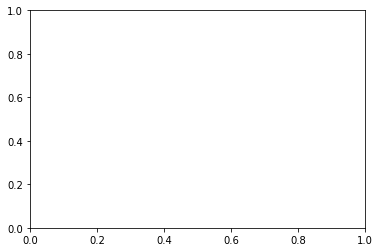

In [74]:
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, diabetes_y_pred, color='blue', linewidth=3)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').